dict_keys(['output_20_1.png', 'output_189_1.png'])


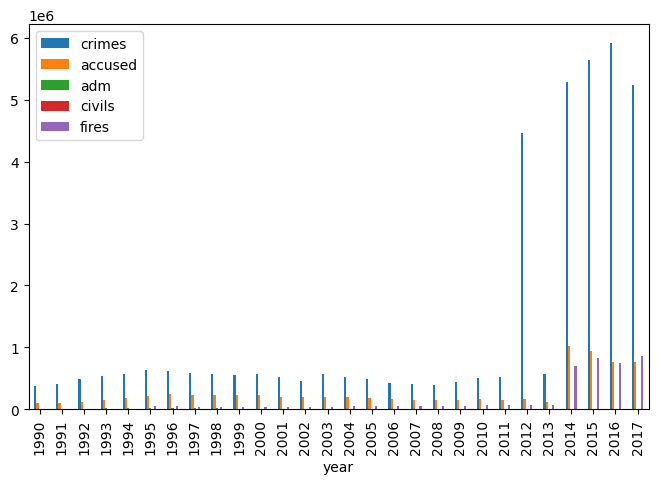

In [5]:
import nbconvert as nbc
import nbformat as nbf
from nbconvert.exporters.rst import RSTExporter
from IPython.display import Image


path = 'main.ipynb'
rste_exporter = RSTExporter()

notebook = nbf.read(path, as_version=4)
(body, resources) = rste_exporter.from_notebook_node(notebook)
print(resources['outputs'].keys())

Image(data=resources['outputs']['output_20_1.png'])

In [18]:
drop_keys = ['attachments', 'metadata', 'execution_count']
def drop_recursice(iterable: dict, drop_keys: list[str]):
    if isinstance(iterable, list) or isinstance(iterable, tuple):
        for item in iterable:
            drop_recursice(item, drop_keys)
    if not isinstance(iterable, dict):
        return
    for k in drop_keys:
        if k in iterable.keys():
            iterable.pop(k)
    for val in iterable.values():
        drop_recursice(val, drop_keys)
cells = notebook['cells']
drop_recursice(cells, drop_keys)
cells

[{'source': '# 3 Виконання'},
 {'cell_type': 'markdown', 'source': '## 3.1 Обрати та завантажити дані'},
 {'cell_type': 'code',
  'outputs': [],
  'source': "import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\n\npath_criminal_statistic = 'data/90-2002_.xlsx' \ndf = pd.read_excel(path_criminal_statistic)\ndf.columns = ['year', 'crimes', 'accused', 'adm', 'civils', 'fires']\ndf = df.set_index('year')\ndf[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.str.replace(' ', ''))\ndf = df.astype(str).apply(lambda x: x.str.replace(',', '.')).astype(float)"},
 {'cell_type': 'markdown',
  'source': '## 3.2 Знайти математичне сподівання, медіану, моду, дисперсію, середньоквадратичне відхилення'},
 {'cell_type': 'markdown',
  'source': '### Математичне сподівання – сума всіх значень, поділена на їхню кількість.'},
 {'cell_type': 'code',
  'outputs': [{'data': {'text/plain': 'crimes     1.37e+06\naccused    2.76e+05\nadm        8.53e+03\nci